In [1]:
pip install -U ipykernel matplotlib scikit-learn scipy seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [3]:
df_stock = pd.read_csv('targetPrice.csv')
df_stock.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [4]:
df_stock.shape

(7781, 1285)

In [5]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB


In [6]:
df_stock.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64

In [7]:
data_new = df_stock[['date','open', 'high', 'low', 'close']]
data_new.describe()

,open,high,low,close
count,7781.000000,7781.000000,7781.000000,7781.000000
mean,34.990220,35.655999,34.301243,34.964414
std,99.841502,101.451058,98.073945,99.790823
min,0.410000,0.435000,0.405000,0.408000
25%,4.050000,4.130000,3.980000,4.030000
50%,10.080000,10.110000,10.005000,10.080000
75%,24.350000,24.500000,24.080000,24.250000
max,795.739990,799.359985,784.960022,797.489990


In [8]:
data_new.isnull().sum()

date     0
open     0
high     0
low      0
close    0
dtype: int64

In [9]:
data_new["tomorrow"]= data_new["close"].shift(-1)
data_new

/var/folders/bh/6_jtsm2n6c95m7tldf2v70zm0000gn/T/ipykernel_30717/3575239668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["tomorrow"]= data_new["close"].shift(-1)


,date,open,high,low,close,tomorrow
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.660000
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,16.950001
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.170000
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,15.710000
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.860000
...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,23.350000
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,23.350000
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,23.610001
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.610001


In [10]:
data_new["target"] = data_new["tomorrow"] > data_new["close"].astype(float)
data_new

/var/folders/bh/6_jtsm2n6c95m7tldf2v70zm0000gn/T/ipykernel_30717/1825596126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["target"] = data_new["tomorrow"] > data_new["close"].astype(float)


,date,open,high,low,close,tomorrow,target
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.660000,False
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,16.950001,False
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.170000,False
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,15.710000,False
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.860000,True
...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,23.350000,True
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,23.350000,False
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,23.610001,True
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.610001,False


In [11]:
model = RandomForestClassifier(n_estimators=300, min_samples_split= 150, random_state=1)

In [12]:
train = data_new.iloc[:-100]
test = data_new.iloc[-100:]

In [13]:
predictors = ["open", "high", "low", "close"] #Exempt the datetime so that the model doesnt train on it. So as to prevent data leakage
model.fit(train[predictors], train["target"])

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,150
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
pred = model.predict(test[predictors])
pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True,  True,
        True])

In [15]:
def scatter_close_vs_open(df, close_col="close", open_col="open"):
    
    plt.figure(figsize=(8,6))
    plt.scatter(df[open_col], df[close_col], alpha=0.7, color="green", edgecolor="black")

    # Reference line (perfect match y = x)
    min_val = min(df[open_col].min(), df[close_col].min())
    max_val = max(df[open_col].max(), df[close_col].max())
    plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="y = x")

    plt.title("Closing Price vs. Opening Price")
    plt.xlabel("Opening Price")
    plt.ylabel("Closing Price")
    plt.legend()
    plt.tight_layout()
    plt.show()


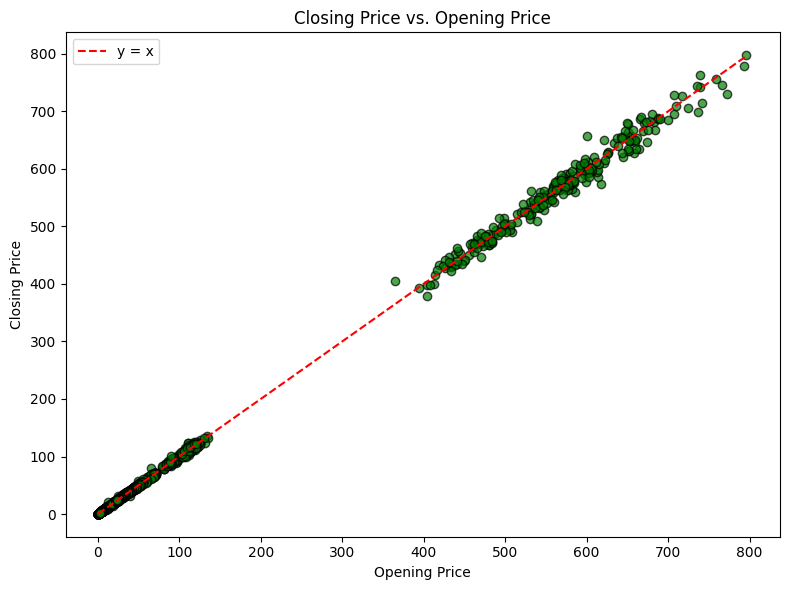

In [16]:
scatter_close_vs_open(data_new, close_col="close", open_col="open")


In [17]:
pred_series = pd.Series(pred) 

In [18]:
counts = pred_series.value_counts().sort_index()

<Axes: >

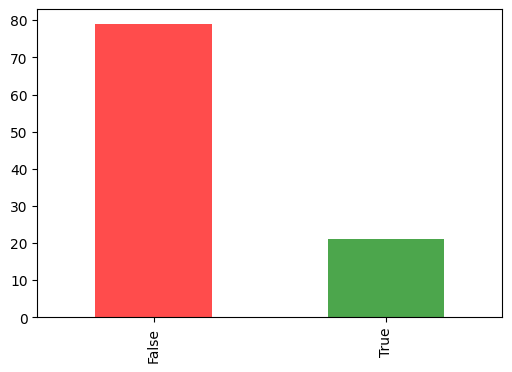

In [19]:
plt.figure(figsize=(6,4))
counts.plot(kind="bar", color=["red", "green"], alpha=0.7)